In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

df = pd.read_csv("heart.csv") 
print("Pregled podataka:")
display(df.head())


Pregled podataka:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
print("\nBroj redova gdje je RestingBP = 0:", (df['RestingBP'] == 0).sum())
print("Broj redova gdje je Cholesterol = 0:", (df['Cholesterol'] == 0).sum())


Broj redova gdje je RestingBP = 0: 1
Broj redova gdje je Cholesterol = 0: 172


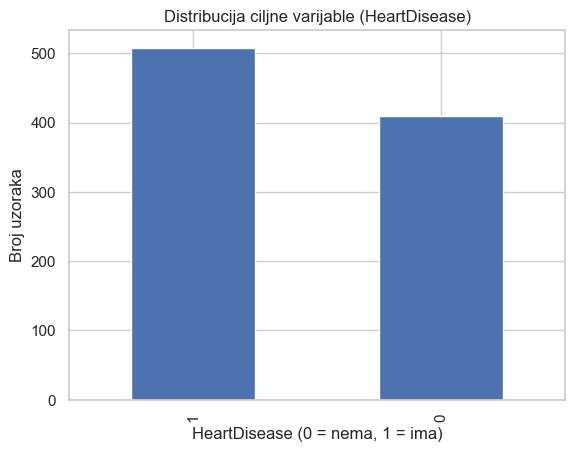

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


In [ ]:
df['HeartDisease'].value_counts().plot(kind='bar')
plt.title("Distribucija ciljne varijable (HeartDisease)")
plt.xlabel("HeartDisease (0 = nema, 1 = ima)")
plt.ylabel("Broj uzoraka")
plt.show()

print(df['HeartDisease'].value_counts(normalize=True))


# ciljna varijabla nije ozbiljno neravnoutezena


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  

Broj instanci po klasama (HeartDisease):
HeartDisease
1    508

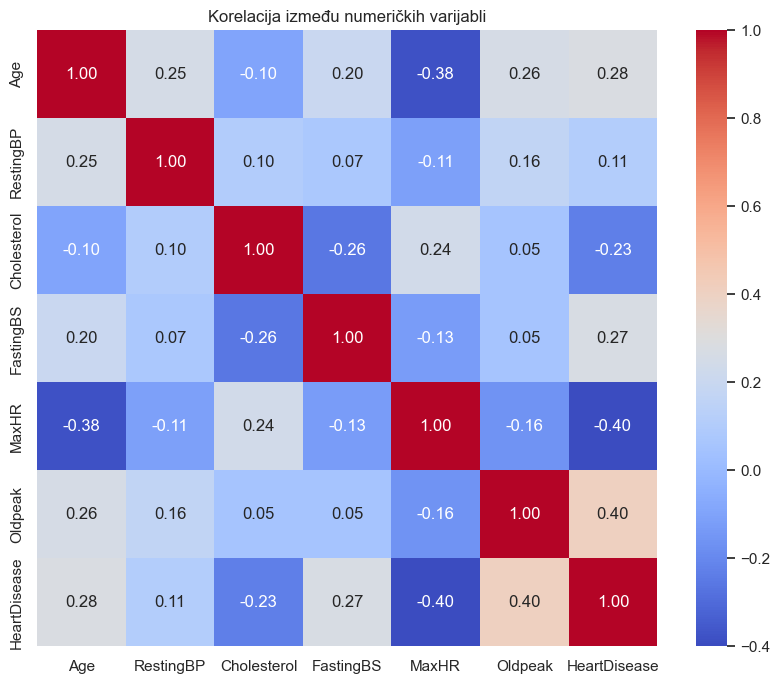

C:\Users\Korisnik\AppData\Local\Temp\ipykernel_29332\4088671969.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='Set2')


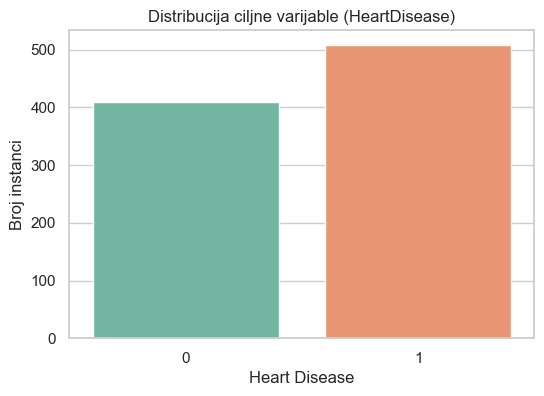

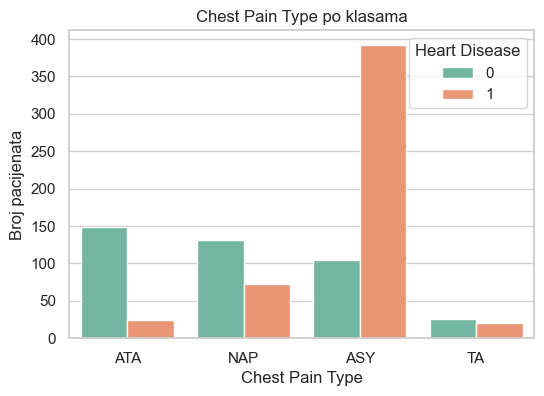

In [19]:

# Statistika i broj instanci po klasama
print(df.describe())
print("\nBroj instanci po klasama (HeartDisease):")
print(df['HeartDisease'].value_counts())

# Korelacija numeričkih vrijednosti
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelacija između numeričkih varijabli')
plt.show()

# Distribucija ciljne varijable
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title('Distribucija ciljne varijable (HeartDisease)')
plt.xlabel('Heart Disease')
plt.ylabel('Broj instanci')
plt.show()

# Chest Pain Type po klasama
plt.figure(figsize=(6, 4))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, palette='Set2')
plt.title('Chest Pain Type po klasama')
plt.xlabel('Chest Pain Type')
plt.ylabel('Broj pacijenata')
plt.legend(title='Heart Disease')
plt.show()



# ne postoji visoka korelacija
# najveca je izmedju oldpeak i age - srednja jaka veza ali nije problematicna

In [12]:
categorical_cols = df.select_dtypes(include='object').columns
print("\nUnikatne vrijednosti za kategoricke kolone:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


Unikatne vrijednosti za kategoricke kolone:
Sex: ['M' 'F']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
RestingECG: ['Normal' 'ST' 'LVH']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']
